<a href="https://colab.research.google.com/github/Marimango06/Laboratorio1signal/blob/main/Lab1_se_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install numpy

LABORATORIO 1

la media1 es: 0.085133036
la media es: 0.085133036
la desviacion1 es: 0.16767807325533862
la desviacion es: 0.16767807325533862
el coeficiente de variacion es: 1.9696005350418682


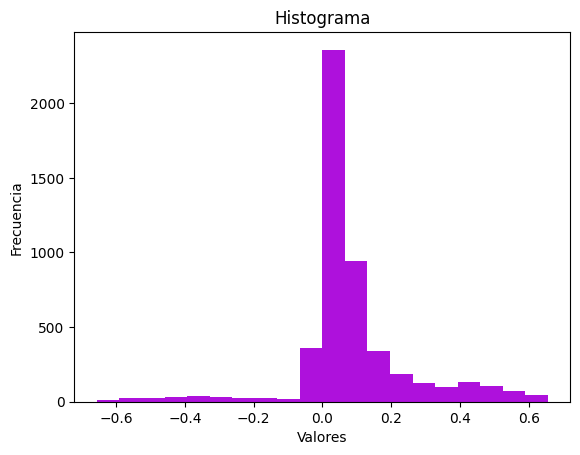

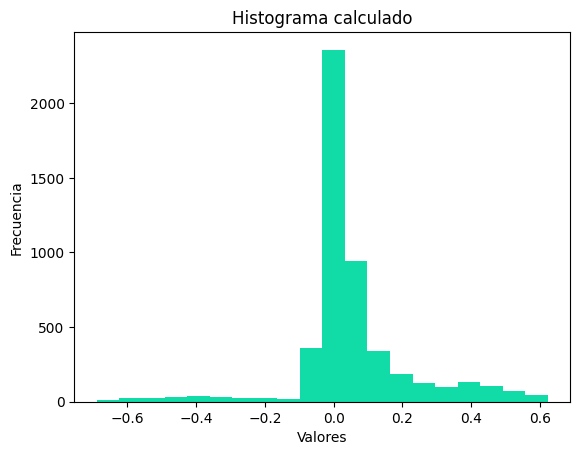

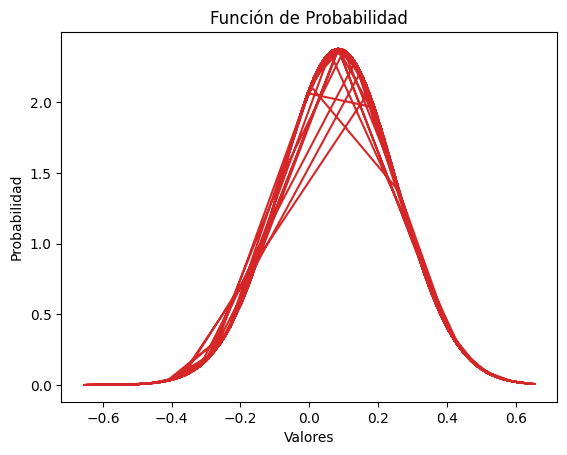

[0.20502 0.17286 0.10854 ... 0.62314 0.59098 0.56686]


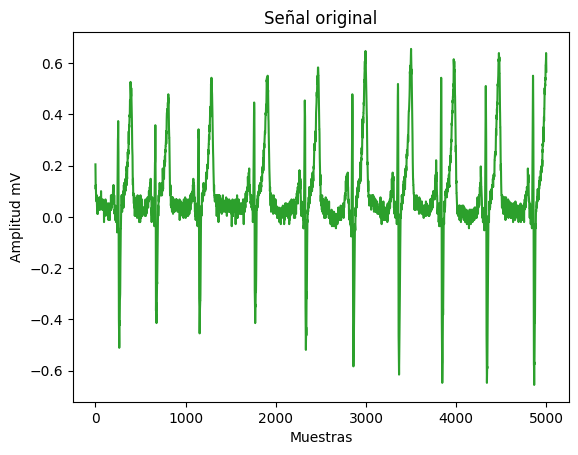

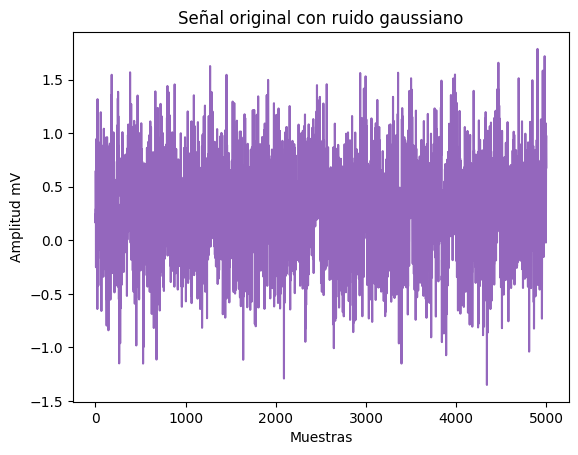

la potencia de señal es: 0.0353635700692
la media del ruido es: 0.19188299163888722
La relacion señal-ruido gaussiano es: -16.912035715409107


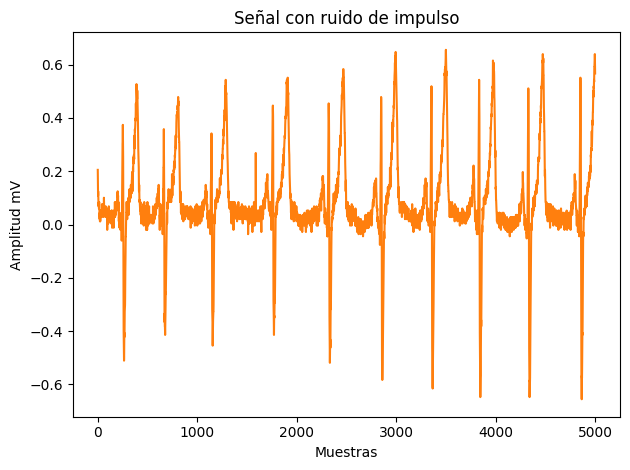

la potencia de señal es: 0.0353635700692
la media del ruido es: 4e-05
La relacion señal-ruido naranja de pulso es: 67.84558021036648


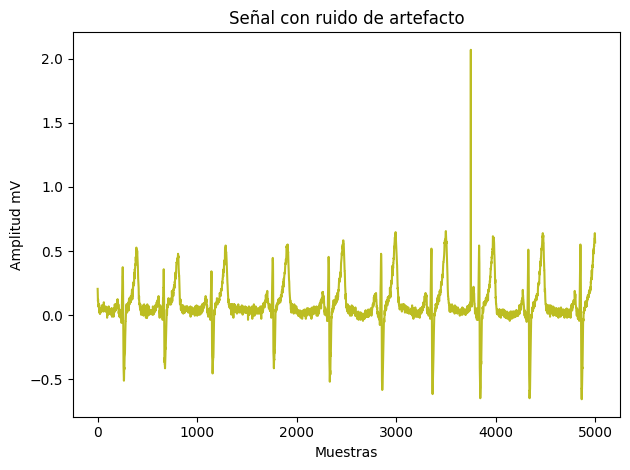

la potencia de señal es: 0.0353635700692
la media del ruido es: 0.0004
La relacion señal-ruido de pulso es: 44.81972928042602


In [7]:
from ctypes import c_void_p
#importar paquete wfdb para leer records de physionet

import wfdb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats #libreria para la funcion de probabilidad

#cargar la informacion (hay que tener los archivos .dat y .hea)
signal = wfdb.rdrecord ('ath_001')
print(signal)

#obtener valores de y en la señal
valores = (signal.p_signal[:,0]) #para acceder a los valores de la señal
valores1= np.array([valores])
#print(valores1)

#obtener el numero de muestras
tamano= signal.sig_len #numero de muestras
#print(valores) #Imprimir valores de la señal
#print(tamano) #Imprimir numero de muestras

#media de la señal
mediauno = 1/tamano * np.sum(valores)
media = np.mean(valores)
print(f"la media1 es: {mediauno}") #Imprimir el valor de la media
print(f"la media es: {media}")

#desviacion estandar de la señal
desviacionuno = np.sqrt(1/tamano * np.sum((valores - mediauno)**2))
desviacion = np.std(valores)
print(f"la desviacion1 es: {desviacionuno}") #Imprimir el valor de la desviacion estandar
print(f"la desviacion es: {desviacion}")

#Coeficiente de variación
cof= desviacion/media
print(f"el coeficiente de variacion es: {cof}") #Imprimir el valor del coeficiente de variacion

# Histograma con función
fig, ax = plt.subplots()
plt.hist(valores, bins=20, color= '#ae11dc')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

# Histografa calculado
# Determinar el rango de los datos
min_value = min(valores)
max_value = max(valores)

# Definir los bins
num_bins = 20
bin_width = (max_value - min_value) / num_bins
bins = [min_value + i * bin_width for i in range(num_bins + 1)]

# Contar los datos en cada bin
counts = [0] * num_bins
for value in valores:
    for i in range(num_bins):
        if bins[i] <= value < bins[i + 1]:
            counts[i] += 1
            break

# Graficar el histograma calculado
plt.bar(bins[:-1], counts, width=bin_width, color= '#11dca8')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma calculado')
plt.show()

#funcion de probabilidad
pdf = stats.norm.pdf(valores, loc=np.mean(valores), scale=np.std(valores))

#grafica de funcion de probabilidad.
plt.plot(valores, pdf,'tab:red')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad')
plt.show()


#generacion de ruido gaussiano <
ruido_gaussiano = np.random.normal(0.2, 0.4, tamano) # Ajusta la media y desviación estándar según tus necesidades
ruido_gaussiano = ruido_gaussiano.flatten()
signal_final = valores.flatten() + ruido_gaussiano #Flatten valores to ensure both arrays are 1D


#generacion de ruido pulso
signal_length = len(valores)
pulse_probability = 0.001
random_numbers = np.random.rand(signal_length)
pulse_noise = np.where(random_numbers < pulse_probability, 0.2, 0)
señal_final2= valores.flatten() + pulse_noise


#generacion de ruido de artefacto
impulse_index = int(0.75* tamano)  # Índice donde se agrega el impulso
impulse_amplitude = 2 # Amplitud del impulso
ruido_artefacto = np.zeros_like(valores)
valores = valores.flatten()
ruido_artefacto[impulse_index] = impulse_amplitude
señal_final3= valores.flatten() + ruido_artefacto
print(señal_final3)

#Graficar la señal original
fig1, ax1 = plt.subplots()
ax1.plot(valores,'tab:green')
ax1.set_xlabel('Muestras')
ax1.set_ylabel('Amplitud mV')
ax1.set_title('Señal original')
plt.show()

#Mostrar la señal original con ruido gaussiano
fig2, ax2 = plt.subplots()
ax2.plot(signal_final,'tab:purple')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Amplitud mV')
ax2.set_title('Señal original con ruido gaussiano')
plt.show()


#calcular la potencia de señal
valores_cuadrados = valores1**2
potencia_señal = (valores_cuadrados.sum()/tamano)
print(f"la potencia de señal es: {potencia_señal}")

#calcular la media del ruido gaussiano
media_ruido = np.mean(ruido_gaussiano)
print(f"la media del ruido es: {media_ruido}")

#Relación señal ruido gaussiano
SNR= 10*np.log(potencia_señal/media_ruido)
print(f"La relacion señal-ruido gaussiano es: {SNR}")


#Mostrar la señal original con ruido pulso
fig3, ax3 = plt.subplots()
ax3.plot(señal_final2,'tab:orange')
ax3.set_xlabel('Muestras')
ax3.set_ylabel('Amplitud mV')
ax3.set_title('Señal con ruido de impulso')

plt.tight_layout()
plt.show()

#calcular la potencia de señal
valores_cuadrados = valores1**2
potencia_señal = (valores_cuadrados.sum()/tamano)
print(f"la potencia de señal es: {potencia_señal}")

#calcular la media del ruido de pulso
media_ruido = np.mean(pulse_noise)
print(f"la media del ruido es: {media_ruido}")

#Relación señal ruido
SNR= 10*np.log(potencia_señal/media_ruido)
print(f"La relacion señal-ruido naranja de pulso es: {SNR}")


#Mostrar la señal original con ruido artefacto
fig4, ax4 = plt.subplots()
ax4.plot(señal_final3,'tab:olive')
ax4.set_xlabel('Muestras')
ax4.set_ylabel('Amplitud mV')
ax4.set_title('Señal con ruido de artefacto')

plt.tight_layout()
plt.show()

#calcular la potencia de señal
valores_cuadrados = valores1**2
potencia_señal = (valores_cuadrados.sum()/tamano)
print(f"la potencia de señal es: {potencia_señal}")

#calcular la media del ruido de pulso
media_ruido = np.mean(ruido_artefacto)
print(f"la media del ruido es: {media_ruido}")

#Relación señal ruido
SNR= 10*np.log(potencia_señal/media_ruido)
print(f"La relacion señal-ruido de pulso es: {SNR}")






